In [1]:
import pandas as pd
import numpy as np
import os
import pyspark.sql.functions as F
from pyspark.sql.functions import *
from pyspark.sql.functions import col

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
DF_NLP_spark = spark.sql("select gtin,gln, lemmatized_DUTCH_EN as Lemmatized, padded_seq__EN, tokenized_EN_DUTCH from default._paddedseq_ingredient")
df_NLP = DF_NLP_spark.toPandas()
display(df_NLP.head())

gtin,gln,Lemmatized,padded_seq__EN,tokenized_EN_DUTCH
8710468068864,8710468000000,kippendij 600gr kip kippendij kippendij 600gr ingrediënt,"List(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4070, 3858, 113, 4070, 4070, 3858, 2)","List(kippendij, 600gr, kip, kippendij, kippendij, 600gr, ingrediënt)"
8710468068925,8710468000000,kipdrumstick 600gr kip kipdrumstick kipdrumstick 600gr ingrediënt kipdrumstick,"List(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3701, 3858, 113, 3701, 3701, 3858, 2, 3701)","List(kipdrumstick, 600gr, kip, kipdrumstick, kipdrumstick, 600gr, ingrediënt, kipdrumstick)"
8710468068956,8710468000000,heel kipver klasse a kip heel kippoulet a rotir heel kip os ingrediënt heel kip,"List(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 404, 30491, 1106, 267, 113, 404, 30492, 267, 30493, 404, 113, 7223, 2, 404, 113)","List(heel, kipver, klasse, a, kip, heel, kippoulet, a, rotir, heel, kip, os, ingrediënt, heel, kip)"
8710468075848,8710468000000,kipfletver klasse a kip ah kipfiletlapjessteak filet poulet kipfiletlapjes 1000 gr schaal ingredient 100 kipfilet,"List(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [3]:
def words_dist_plot(df_NLP):
    df_NLP['length_tokenized'] = df_NLP['tokenized_EN_DUTCH'].str.len()
    fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
    df_item = df_NLP['length_tokenized'].value_counts().reset_index()
    #df_item = df_item.replace('', 'Empty', regex=True)
    #df_item = df_item.replace(r'^\s*$', np.nan, regex=True)
    #df_item = df_item.dropna()
    #print("nan values "+feature+" = ",df_item[feature].isna().sum(), #isna of isnull 
    #      "Unique items: ",len(df_item[feature].unique()))
    #sns.barplot(data=df_item, x="index", y='length_tokenized', ax=ax, orient="v")
    sns.set_style("ticks")
    sns.set_theme(style="whitegrid")
    sns.set(font_scale=2.5)
    sns.set_style("whitegrid")
    ax2 = sns.histplot(df_NLP['length_tokenized'], kde=True, alpha=0.2, color="dodgerblue", bins=150)
    ax2.set_xlim(0, 150)

    #ax2.bar_label(ax2.containers[0],fontsize=14)
    ax2.set_xticks(np.arange(0,150,10))
    ax2.set_yticks(np.arange(0,3000,1000))
    ax2.set_xlabel("Amount of tokens per product\n (Maximum is 310 tokens)", fontsize=20)
    ax2.set_ylabel("Frequency", fontsize=20)
    ax2.set_title("Distribution of tokens per product", fontsize=25)
    #ax.lines[0].set_color('crimson')
    #ax.bar_label(ax.containers[0])

    #ax.set_xlabel("Amount of words per product")
    #ax.set_ylabel("Frequency")
    #ax.title.set_text("Distribution of words per product")
    #ax.set_xlim(0, 80)
    #ax.set_xticks([])
   
    sns.despine(top=True, right=True, left=True, bottom=True, ax=ax2)
    return df_item

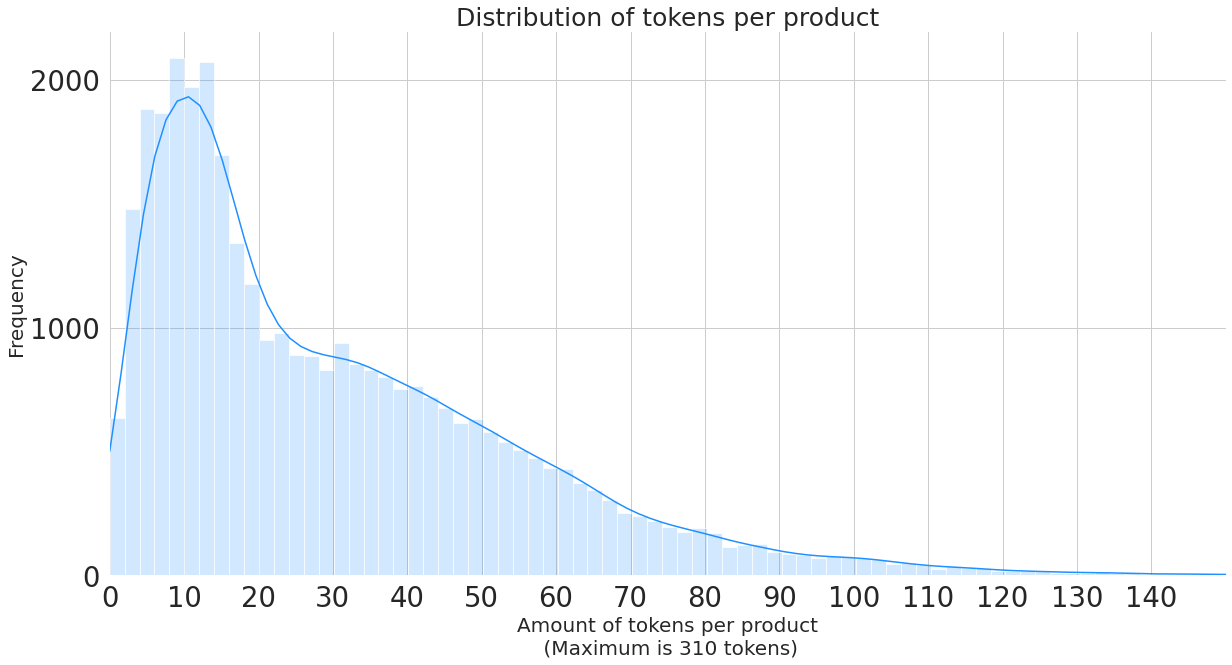

In [4]:
df_item = words_dist_plot(df_NLP)

In [5]:
from statistics import mean
tokens = df_NLP['tokenized_EN_DUTCH'].str.len().tolist()
mean(tokens)

Out[45]: 30.74965209735594